In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

## Importing the index comparison

In [77]:
idx30_df = pd.read_csv('idx30.csv')
lq45_df = pd.read_csv('lq45.csv')

In [78]:
# here, the Price column is the closing price
lq45_df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Dec 08, 2020",933.28,939.18,940.06,927.79,3.75B,-0.32%
1,"Dec 07, 2020",936.32,927.90,938.27,927.02,2.84B,2.19%
2,"Dec 04, 2020",916.25,920.29,920.49,910.44,2.31B,-0.53%
3,"Dec 03, 2020",921.18,927.29,929.72,917.16,3.31B,-0.13%
4,"Dec 02, 2020",922.36,912.68,922.36,905.94,3.73B,1.94%


In [79]:
def adjust_date(x):
    
    """Change the date format"""
    
    dic_month = {'Jan':'01', 'Feb':'02', 'Mar':'03', 
                 'Apr':'04', 'Mei':'05', 'Jun':'06', 
                 'Jul':'07', 'Aug':'08', 'Sep':'09', 
                 'Oct':'10', 'Nov':'11', 'Dec':'12'}
    
    x = x.replace(',', '')
    x = x.split()
    x[0] = dic_month[x[0]]
    date = [x[1], x[0], x[-1]]
    date = "/".join(date)
    return date 

In [80]:
idx30_df['Date'] = idx30_df['Date'].apply(lambda x: adjust_date(x))
lq45_df['Date'] = lq45_df['Date'].apply(lambda x: adjust_date(x))

In [81]:
idx30_df['Date'] = pd.to_datetime(idx30_df['Date'], dayfirst=True)
lq45_df['Date'] = pd.to_datetime(lq45_df['Date'], dayfirst=True)

In [82]:
idx30_df = idx30_df.sort_values(by='Date')
lq45_df = lq45_df.sort_values(by='Date')

In [83]:
idx30_df.set_index('Date', inplace = True)
lq45_df.set_index('Date', inplace = True)

In [85]:
idx30_df['return'] = (idx30_df['Price']/idx30_df['Price'][0])-1
lq45_df['return'] = (lq45_df['Price']/lq45_df['Price'][0])-1

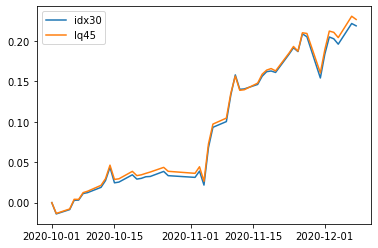

In [86]:
plt.plot(idx30_df['return'], label='idx30')
plt.plot(lq45_df['return'], label='lq45')
plt.legend()
plt.show()

## Importing the IDXV30 index with their weights

In [43]:
idxv30_df = pd.read_csv('idxv30.csv')

In [47]:
idxv30_df

,ticker,weight
0,PNLF.JK,0.025
1,BMTR.JK,0.022
2,PNBN.JK,0.041
3,ELSA.JK,0.016
4,BJTM.JK,0.000
5,MNCN.JK,0.053
6,BDMN.JK,0.000
7,WEGE.JK,0.006
8,BJBR.JK,0.142
9,ISAT.JK,0.030


In [49]:
query = " ".join(idxv30_df['ticker'])
idx30_obj = yf.Tickers(query)

In [50]:
idx30_obj

yfinance.Tickers object <PNLF.JK,BMTR.JK,PNBN.JK,ELSA.JK,BJTM.JK,MNCN.JK,BDMN.JK,WEGE.JK,BJBR.JK,ISAT.JK,WTON.JK,EXCL.JK,ERAA.JK,LSIP.JK,LINK.JK,GGRM.JK,BBNI.JK,ASII.JK,CTRA.JK,BSDE.JK,WIKA.JK,INDF.JK,MTDL.JK,WOOD.JK,UNTR.JK,PTPP.JK,AKRA.JK,BMRI.JK,PTBA.JK,JPFA.JK>

In [60]:
idx30_obj.tickers[0].history()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-11-09,200.0,204.0,199.0,202.0,22360200,0,0
2020-11-10,208.0,208.0,202.0,208.0,44848300,0,0
2020-11-11,210.0,210.0,202.0,204.0,52334800,0,0
2020-11-12,204.0,206.0,202.0,202.0,12919500,0,0
2020-11-13,200.0,208.0,200.0,206.0,19817700,0,0
2020-11-16,206.0,214.0,206.0,212.0,45622000,0,0
2020-11-17,214.0,220.0,212.0,216.0,49717800,0,0
2020-11-18,220.0,220.0,210.0,212.0,24357600,0,0
2020-11-19,212.0,216.0,210.0,216.0,81306000,0,0


### Extract all closing price using yfinance

In [64]:
def extract_close_price(obj, tickers, start, end):
    price_df = pd.DataFrame([])
    for index, ticker in enumerate(tickers):
        df_history = obj.tickers[index].history(start=start, end=end)
        price_df[ticker] = df_history['Close']
    return price_df

In [65]:
hist_df = extract_close_price(idx30_obj, list(idxv30_df['ticker']), start="2020-10-01", end="2020-12-09")

In [66]:
hist_df

,PNLF.JK,BMTR.JK,PNBN.JK,ELSA.JK,BJTM.JK,MNCN.JK,BDMN.JK,WEGE.JK,BJBR.JK,ISAT.JK,...,WIKA.JK,INDF.JK,MTDL.JK,WOOD.JK,UNTR.JK,PTPP.JK,AKRA.JK,BMRI.JK,PTBA.JK,JPFA.JK
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-30,183.0,224.0,740.0,194.0,510.0,720.0,2170.0,157.0,870.0,1990.0,...,1095.0,7150.0,1610.0,380.0,22627.677734,825.0,2550.0,4960.0,1970.0,1105.0
2020-10-01,182.0,222.0,745.0,199.0,530.0,730.0,2270.0,160.0,905.0,2070.0,...,1120.0,7175.0,1610.0,376.0,22602.867188,840.0,2610.0,5200.0,2000.0,1170.0
2020-10-02,180.0,214.0,745.0,195.0,515.0,730.0,2220.0,156.0,880.0,2000.0,...,1075.0,7075.0,1590.0,374.0,22503.623047,805.0,2570.0,5200.0,1970.0,1145.0
2020-10-05,181.0,212.0,745.0,199.0,515.0,725.0,2240.0,159.0,895.0,2020.0,...,1090.0,7100.0,1605.0,372.0,22156.267578,820.0,2610.0,5350.0,1950.0,1145.0
2020-10-06,182.0,232.0,745.0,204.0,530.0,820.0,2260.0,171.0,910.0,2040.0,...,1175.0,7225.0,1600.0,372.0,22454.000000,865.0,2660.0,5500.0,1970.0,1160.0
2020-10-07,183.0,224.0,750.0,204.0,525.0,785.0,2220.0,169.0,905.0,2080.0,...,1160.0,7125.0,1600.0,398.0,22275.000000,870.0,2600.0,5550.0,1965.0,1135.0
2020-10-08,193.0,220.0,785.0,206.0,545.0,785.0,2240.0,178.0,915.0,2070.0,...,1160.0,7225.0,1605.0,394.0,22600.000000,865.0,2610.0,5450.0,1990.0,1130.0
2020-10-09,190.0,226.0,800.0,210.0,545.0,790.0,2280.0,182.0,915.0,2070.0,...,1215.0,7225.0,1610.0,396.0,22400.000000,895.0,2620.0,5550.0,1985.0,1135.0
2020-10-12,189.0,232.0,795.0,212.0,540.0,800.0,2280.0,180.0,930.0,2060.0,...,1215.0,7200.0,1605.0,402.0,22500.000000,905.0,2640.0,5625.0,2020.0,1135.0


In [87]:
return_df = pd.DataFrame([])
for each_ticker in list(idxv30_df['ticker']):
    return_df[each_ticker] = (hist_df[each_ticker]/hist_df[each_ticker][0])-1

### Apply the weights accordingly

In [88]:
index_df = pd.DataFrame([])
for index, ticker in enumerate(list(idxv30_df['ticker'])):
    weight = idxv30_df.loc[index, 'weight']
    return_df[ticker] = return_df[ticker]*weight
index_df['index_ret'] = return_df.sum(axis=1)

In [89]:
index_df

,index_ret
Date,
2020-09-30,0.000000
2020-10-01,0.030450
2020-10-02,0.012259
2020-10-05,0.027562
2020-10-06,0.050528
2020-10-07,0.042624
2020-10-08,0.050519
2020-10-09,0.060443
2020-10-12,0.071990


### Graph result

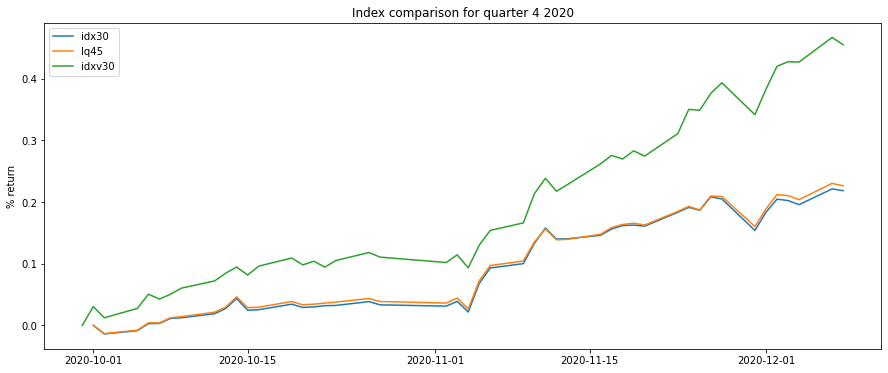

In [92]:
plt.figure(figsize=(15, 6))
plt.plot(idx30_df['return'], label='idx30')
plt.plot(lq45_df['return'], label='lq45')
plt.plot(index_df['index_ret'], label='idxv30')
plt.legend()
plt.title('Index comparison for quarter 4 2020')
plt.ylabel('% return')
plt.show()

As you can see, the idx value 30 index are far superior compared to lq45 and idx30. This might be due to their cheap fundamental values, which may attract other retail investor more to invest in these companies. Companies in idx30 may not give much return compared to idxv30, as the former consist of top 30 companies with the best fundamental values, but they may not be cheap. In contrast, the idxv30 consist of companies with decent fundamental values, but they are also undervalued. 

However, the time horizon used here may be largely affected by the COVID pandemic. Thus, more research needs to be done in order to further support this findings.